<a href="https://colab.research.google.com/github/ashiyaaa121/AI-worksheet/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Import numpy library for numerical operations
import numpy as np

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("diabetes_.csv")

# Display the first 5 rows of the dataset
data.head()

# Display dataset information (column names, data types, non-null counts)
data.info()

# Display statistical summary of numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
# Separate features (X) by dropping the target column
X = data.drop(columns=['Outcome']).values

# Store target labels (y)
y = data['Outcome'].values

# Custom function to split data into training and testing sets
def train_test_split(X, y, test_size=0.3, random_seed=42):

    # Set random seed for reproducibility
    np.random.seed(random_seed)

    # Create an array of indices based on number of samples
    indices = np.arange(X.shape[0])

    # Shuffle the indices randomly
    np.random.shuffle(indices)

    # Calculate number of test samples
    test_split_size = int(len(X) * test_size)

    # Get indices for training data
    train_indices = indices[:test_split_size]

    # Get indices for testing data
    test_indices = indices[test_split_size:]

    # Split feature data into training and testing sets
    X_train, X_test = X[train_indices], X[test_indices]

    # Split target labels into training and testing sets
    y_train, y_test = y[train_indices], y[test_indices]

    # Return all four datasets
    return X_train, X_test, y_train, y_test


In [5]:
# Function to calculate Euclidean distance between two points

def euclid_distance(point1, point2):
    """
    Computes distance using the Euclidean distance formula
    """

    # Check if both points have the same dimensions
    if point1.shape != point2.shape:
        raise ValueError("Points dimension must be same")

    # Calculate Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance



# Function to predict class for a single query point using KNN

def knn_single_query(query, X_train, y_train, k=5):
    """
    Predicts class label for one test sample
    """

    # Calculate distance of query point from all training points
    distances = [euclid_distance(query, x) for x in X_train]

    # Get indices of points sorted by distance
    sorted_index = np.argsort(distances)

    # Select indices of k nearest neighbors
    nearest_index = sorted_index[:k]

    # Get labels of nearest neighbors
    nearest_labels = y_train[nearest_index]

    # Predict the most common class label
    prediction = np.bincount(nearest_labels).argmax()
    return prediction



# Function to predict classes for all test samples

def knn_test_sample(X_test, X_train, y_train, k=5):
    """
    Predicts class labels for all test samples
    """

    # Predict class for each test sample
    predictions = [knn_single_query(x, X_train, y_train, k) for x in X_test]

    # Return predictions as numpy array
    return np.array(predictions)



# Function to calculate accuracy of the model

def calculate_accuracy(y_test, y_pred):
    """
    Calculates accuracy of the KNN algorithm
    """

    # Count correct predictions
    correct_prediction = np.sum(y_test == y_pred)

    # Total number of predictions
    total_prediction = len(y_pred)

    # Calculate accuracy percentage
    accuracy = (correct_prediction / total_prediction) * 100
    return accuracy



# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y)


# Run KNN on first 20 test samples

knn_prediction = knn_test_sample(X_test[:20], X_train, y_train, k=17)

# Actual labels for comparison
actual_label = y_test[:20]

# Print results
print("KNN algorithm prediction:", knn_prediction)
print("Actual Label:", actual_label)


KNN algorithm prediction: [0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
Actual Label: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]


In [6]:
# Scale the feature matrix using Min-Max normalization

X_scaled = (X - X.min()) / (X.max() - X.min())

# Split the scaled data into training and testing sets
Xs_train, Xs_test, y_train, y_test = train_test_split(X_scaled, y)

# Run KNN on first 20 scaled test samples
scaled_prediction = knn_test_sample(Xs_test[:20], Xs_train, y_train, k=17)

# Actual labels for comparison
actual_label_scale = y_test[:20]

# Print scaled KNN predictions and actual labels
print("KNN algorithm prediction:", scaled_prediction)
print("Actual Label:", actual_label_scale)



# Compare accuracy of original and scaled datasets

# Accuracy using original (unscaled) dataset
print(
    "Accuracy of original dataset:",
    calculate_accuracy(actual_label, knn_prediction),
    "%"
)

# Accuracy using scaled dataset
print(
    "Accuracy of scaled dataset:",
    calculate_accuracy(actual_label_scale, scaled_prediction),
    "%"
)


KNN algorithm prediction: [0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
Actual Label: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0]
Accuracy of original dataset: 85.0 %
Accuracy of scaled dataset: 85.0 %


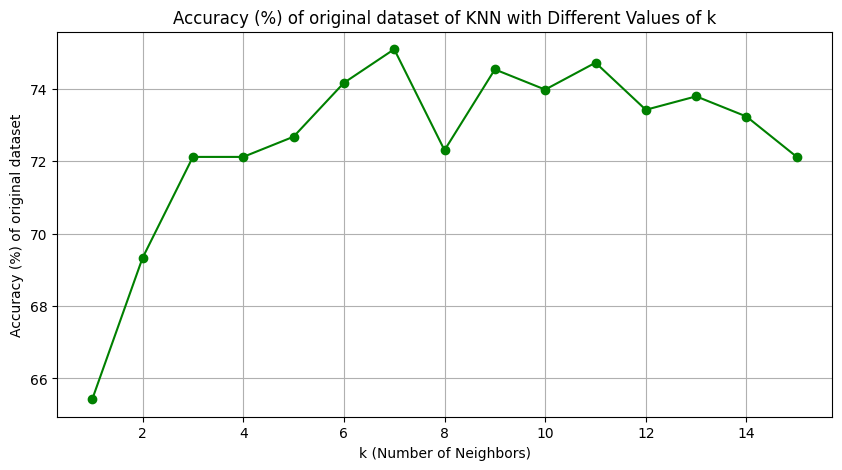

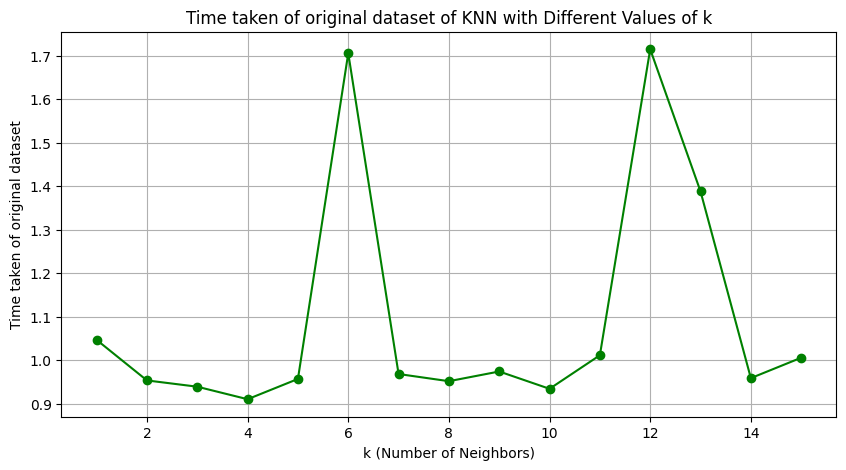

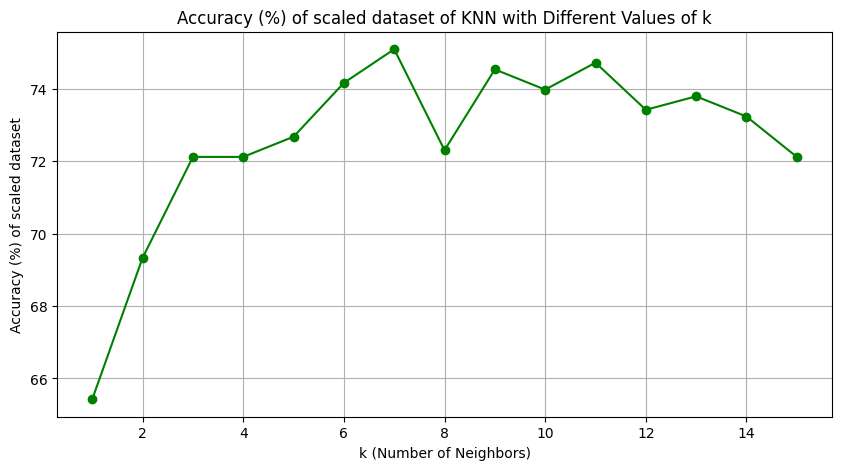

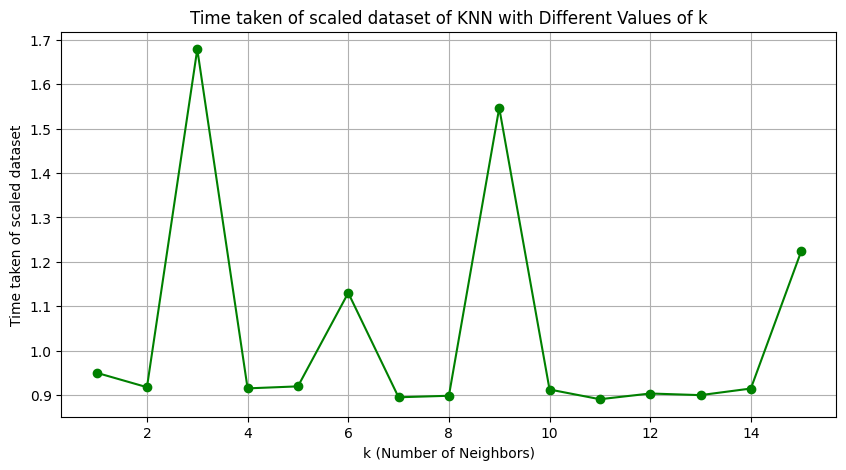

In [7]:
# Import timeit to measure execution time
from timeit import timeit

# Function to experiment with different values of k
# Measures accuracy and time taken for each k

def exp_knn_k_values(X_train, y_train, X_test, y_test, k_values):

    # Dictionary to store accuracy for each k
    accuracies = {}

    # Dictionary to store time taken for each k
    times = {}

    # Loop through different values of k
    for k in k_values:

        # Make predictions using KNN
        prediction = knn_test_sample(X_test, X_train, y_train, k)

        # Measure time taken to make predictions
        times[k] = timeit(
            lambda: knn_test_sample(X_test, X_train, y_train, k),
            number=1
        )

        # Calculate accuracy
        accuracy = calculate_accuracy(y_test, prediction)
        accuracies[k] = accuracy

    # Return accuracy and time dictionaries
    return accuracies, times



# Import matplotlib for visualization
import matplotlib.pyplot as plt


# Function to plot k vs accuracy or time taken
def plot_diff_k(items, k_values, description):

    # Create figure
    plt.figure(figsize=(10, 5))

    # Plot values with green color
    plt.plot(k_values, list(items.values()), marker='o', color='green')

    # Label axes
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel(description)

    # Add title
    plt.title(f'{description} of KNN with Different Values of k')

    # Show grid
    plt.grid(True)

    # Display plot
    plt.show()




# Define range of k values
k_values = range(1, 16)

# Run experiment on original dataset
accuracy, timetaken = exp_knn_k_values(
    X_train, y_train, X_test, y_test, k_values
)

# Run experiment on scaled dataset
scaled_accuracy, scaled_timetaken = exp_knn_k_values(
    Xs_train, y_train, Xs_test, y_test, k_values
)


# Plot results for original dataset
plot_diff_k(accuracy, k_values, "Accuracy (%) of original dataset")
plot_diff_k(timetaken, k_values, "Time taken of original dataset")


# Plot results for scaled dataset
plot_diff_k(scaled_accuracy, k_values, "Accuracy (%) of scaled dataset")
plot_diff_k(scaled_timetaken, k_values, "Time taken of scaled dataset")
